<a href="https://colab.research.google.com/github/gusmaomarcos/alura/blob/main/a_care.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv'
dados = pd.read_csv(url)
display(dados.head(3))
display(dados.tail(3))

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.8,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN


,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,103.78,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.786,0.0000,0.2871,0.07039,NaN


In [ ]:
dados.describe()

,id,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
count,5.690000e+02,569.000000,569.000000,569.000000,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02,569.000000,569.000000,569.000000,150.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,1.037800e+02,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,7.860000e-01,0.114606,0.290076,0.083946,0.490452
std,1.250206e+08,3.524049,4.301036,24.298981,7.538380e-13,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,1.333440e-15,0.065732,0.061867,0.018061,0.295748
min,8.670000e+03,6.981000,9.710000,43.790000,1.037800e+02,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,7.860000e-01,0.000000,0.156500,0.055040,0.008199
25%,8.692180e+05,11.700000,16.170000,75.170000,1.037800e+02,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,7.860000e-01,0.064930,0.250400,0.071460,0.209129
50%,9.060240e+05,13.370000,18.840000,86.240000,1.037800e+02,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,7.860000e-01,0.099930,0.282200,0.080040,0.472064
75%,8.813129e+06,15.780000,21.800000,104.100000,1.037800e+02,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,7.860000e-01,0.161400,0.317900,0.092080,0.780266
max,9.113205e+08,28.110000,39.280000,188.500000,1.037800e+02,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,7.860000e-01,0.291000,0.663800,0.207500,0.995380


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

In [ ]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 1234
random.seed(SEED)

valores_exames = dados.drop(columns=['id', 'diagnostico', 'exame_33'])
diagnostico = dados.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico, test_size=0.3)

In [ ]:
treino_x.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
391,8.734,16.84,55.27,103.78,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,0.07098,0.5169,2.079,3.167,28.85,0.015820,0.019660,0.00000,0.000000,0.01865,0.006736,10.17,22.80,64.01,317.0,0.1460,0.1310,0.0000,0.786,0.00000,0.2445,0.08865
410,11.360,17.57,72.49,103.78,399.8,0.08858,0.05313,0.02783,0.02100,0.1601,0.05913,0.1916,1.555,1.359,13.66,0.005391,0.009947,0.01163,0.005872,0.01341,0.001659,13.05,36.32,85.07,521.3,0.1453,0.1622,0.1811,0.786,0.08698,0.2973,0.07745
138,14.950,17.57,96.85,103.78,678.1,0.11670,0.13050,0.15390,0.08624,0.1957,0.06216,1.2960,1.452,8.419,101.90,0.010000,0.034800,0.06577,0.028010,0.05168,0.002887,18.55,21.43,121.40,971.4,0.1411,0.2164,0.3355,0.786,0.16670,0.3414,0.07147
261,17.350,23.06,111.00,103.78,933.1,0.08662,0.06290,0.02891,0.02837,0.1564,0.05307,0.4007,1.317,2.577,44.41,0.005726,0.011060,0.01246,0.007671,0.01411,0.001578,19.85,31.47,128.20,1218.0,0.1240,0.1486,0.1211,0.786,0.08235,0.2452,0.06515
507,11.060,17.12,71.25,103.78,366.5,0.11940,0.10710,0.04063,0.04268,0.1954,0.07976,0.1779,1.030,1.318,12.30,0.012620,0.023480,0.01800,0.012850,0.02220,0.008313,11.69,20.74,76.08,411.1,0.1662,0.2031,0.1256,0.786,0.09514,0.2780,0.11680


In [ ]:
treino_y.head()

391    B
410    B
138    M
261    M
507    B
Name: diagnostico, dtype: object

In [ ]:
#dados.isnull().sum()
#forma nova de encontrar nan

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators=100)
modelo.fit(treino_x, treino_y)

print('Resultado da classificacao por Random Forest %.2f%%' %(modelo.score(teste_x, teste_y)*100))

Resultado da classificacao por Random Forest 92.40%


In [ ]:
from sklearn.dummy import DummyClassifier

modelo = DummyClassifier(strategy='most_frequent')
modelo.fit(treino_x, treino_y)

print('Resultado da classificacao pelo Dummy most frequent: %.2f%%' %(modelo.score(teste_x, teste_y)*100))

Resultado da classificacao pelo Dummy most frequent: 61.40%


In [ ]:
dados_plot = pd.concat([diagnostico, valores_exames.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

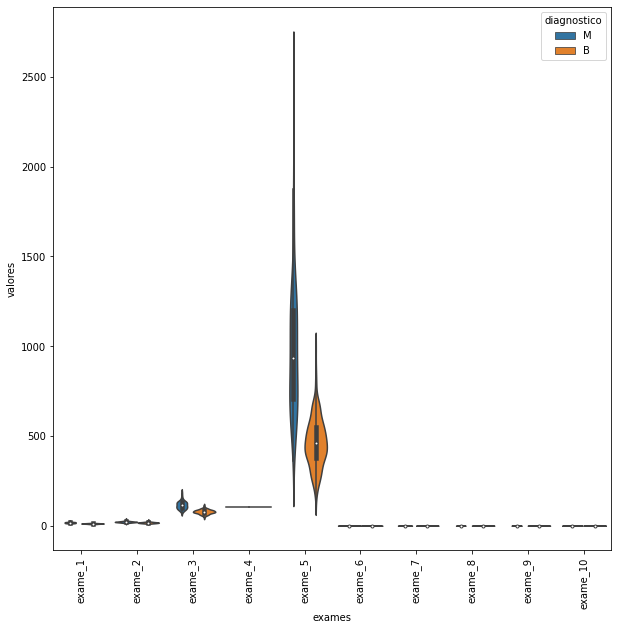

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.violinplot(data = dados_plot, x='exames', y='valores', hue='diagnostico')
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

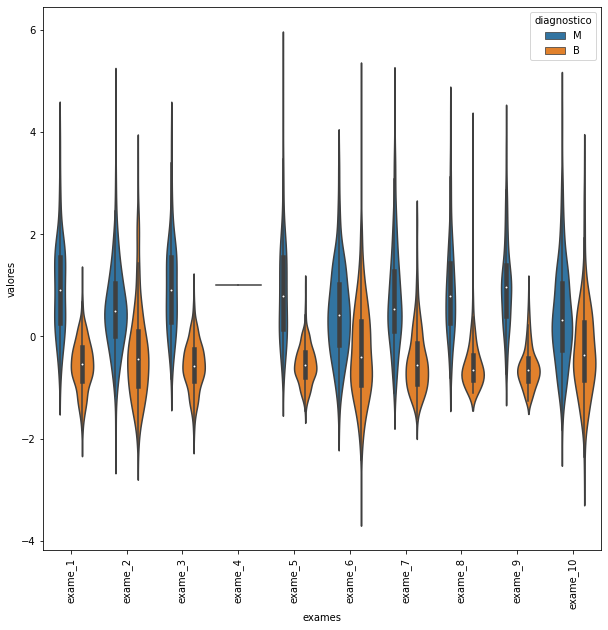

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames)
valores_exames_v2 = padronizador.transform(valores_exames)
valores_exames_v2 = pd.DataFrame(valores_exames_v2, columns=valores_exames.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')


plt.figure(figsize=(10,10))
sns.violinplot(data = dados_plot, x='exames', y='valores', hue='diagnostico')
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

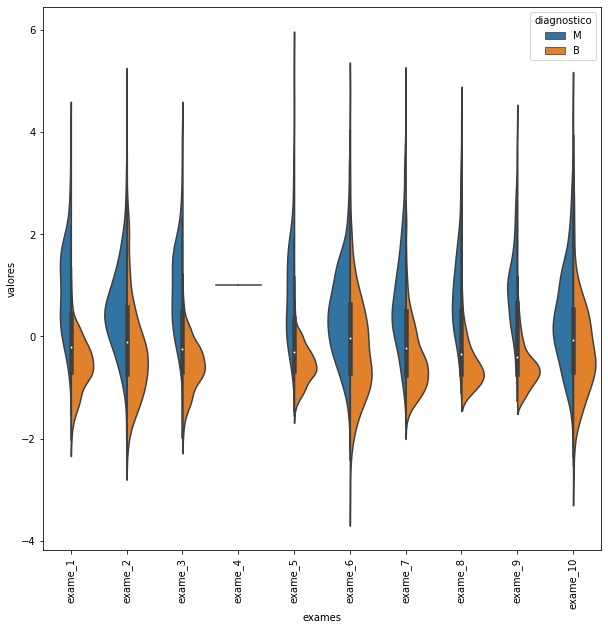

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames)
valores_exames_v2 = padronizador.transform(valores_exames)
valores_exames_v2 = pd.DataFrame(valores_exames_v2, columns=valores_exames.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')


plt.figure(figsize=(10,10))
sns.violinplot(data = dados_plot, x='exames', y='valores', hue='diagnostico', split=True)
plt.xticks(rotation=90)


In [ ]:
valores_exames_v2.exame_4

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
564    1.0
565    1.0
566    1.0
567    1.0
568    1.0
Name: exame_4, Length: 569, dtype: float64

In [ ]:
valores_exames.exame_4

0      103.78
1      103.78
2      103.78
3      103.78
4      103.78
        ...  
564    103.78
565    103.78
566    103.78
567    103.78
568    103.78
Name: exame_4, Length: 569, dtype: float64

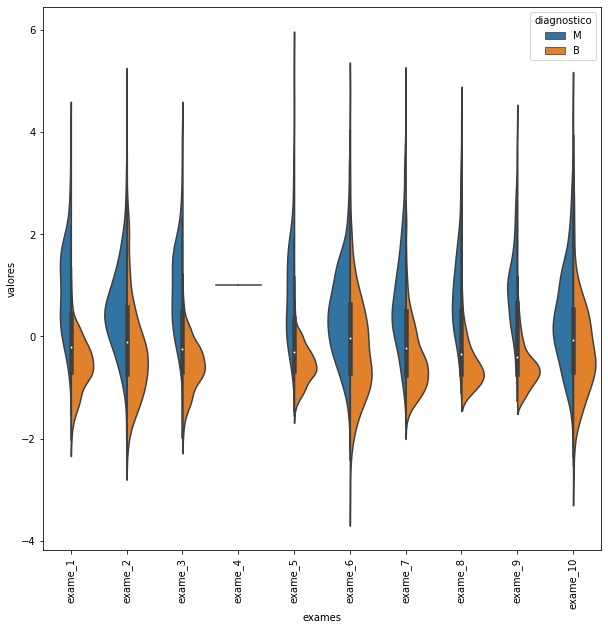

In [ ]:
def grafico_violino(valores, inicio, fim):

  dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,inicio:fim]], axis=1)
  dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')


  plt.figure(figsize=(10,10))
  sns.violinplot(data = dados_plot, x='exames', y='valores', hue='diagnostico', split=True)
  plt.xticks(rotation=90)
grafico_violino(valores_exames_v2, 0, 10)

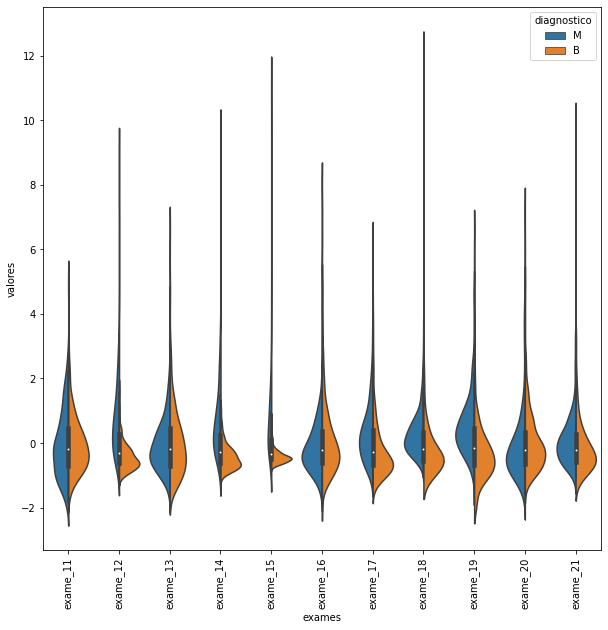

In [ ]:
grafico_violino(valores_exames_v2, 10, 21)

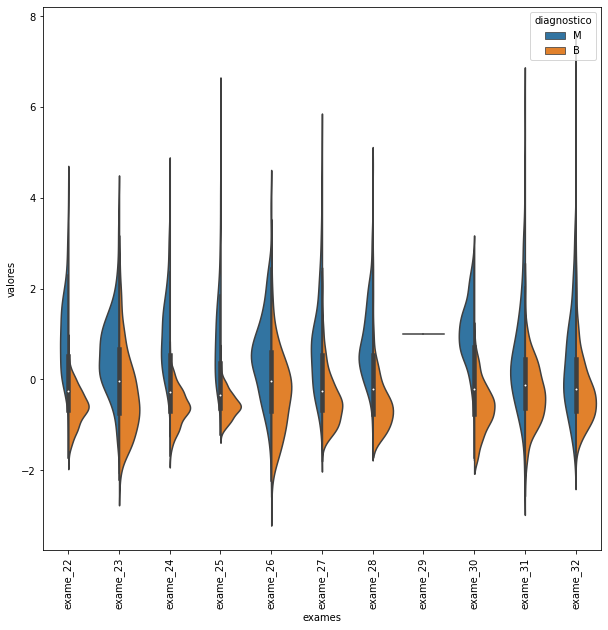

In [ ]:
grafico_violino(valores_exames_v2, 21, 32)

In [ ]:
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_29', 'exame_4'])

In [ ]:
def classificar(valores):
  from sklearn.model_selection import train_test_split
  from numpy import random
  from sklearn.ensemble import RandomForestClassifier

  SEED = 1234
  random.seed(SEED)

  treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size=0.3)
  modelo = RandomForestClassifier(n_estimators=100)
  modelo.fit(treino_x, treino_y)

  print('Resultado da classificacao por Random Forest %.2f%%' %(modelo.score(teste_x, teste_y)*100))

In [ ]:
classificar(valores_exames_v3)

Resultado da classificacao por Random Forest 92.98%


In [ ]:
valores_exames_v3.corr()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


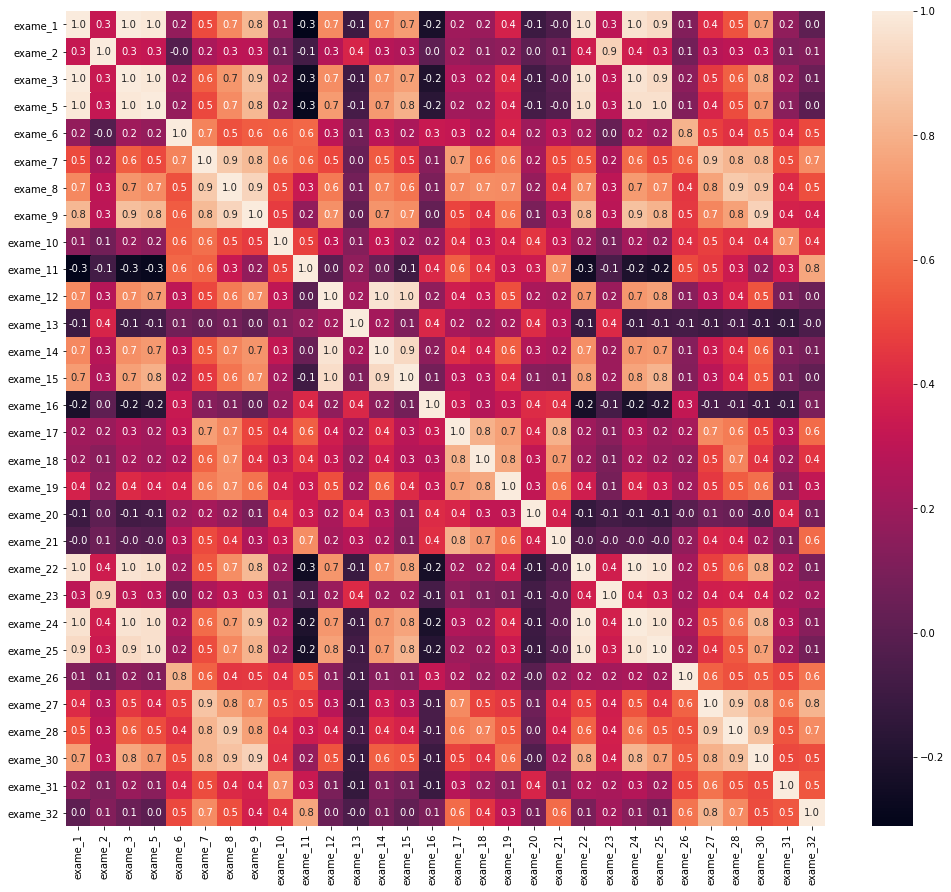

In [ ]:
plt.figure(figsize=(17,15))
sns.heatmap(data=valores_exames_v3.corr(), annot=True, fmt='.1f')

In [ ]:
matriz_correlacao = valores_exames_v3.corr()
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_v2 = matriz_correlacao_v1.sum()

In [ ]:
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [ ]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [ ]:
valores_exames_v4 = valores_exames_v3.drop(columns=['exame_1','exame_22'])
valores_exames_v4

,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [ ]:
classificar(valores_exames_v4)

Resultado da classificacao por Random Forest 93.57%


In [ ]:
valores_exames_v5 = valores_exames_v3.drop(columns=['exame_3','exame_24'])
classificar(valores_exames_v5)

Resultado da classificacao por Random Forest 92.98%


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_k = SelectKBest(chi2, k=5)

In [ ]:
selecionar_k

SelectKBest(k=5, score_func=<function chi2 at 0x7fef6e296050>)

In [ ]:
valores_exames_v6 = valores_exames.drop(columns=(['exame_4','exame_29','exame_3','exame_24']))
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)

selecionar_k.fit(treino_x, treino_y)
treino_k = selecionar_k.transform(treino_x)
teste_k = selecionar_k.transform(teste_x)

In [ ]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_k, treino_y)
print('Resultado da classificacao por Random Forest %.2f%%' %(classificador.score(teste_k, teste_y)*100))

Resultado da classificacao por Random Forest 95.91%


In [ ]:
from sklearn.metrics import confusion_matrix
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_k))

In [ ]:
matriz_confusao

array([[109,   2],
       [  5,  55]])

[Text(49.5, 0.5, 'Real'), Text(0.5, 49.5, 'Predicao')]

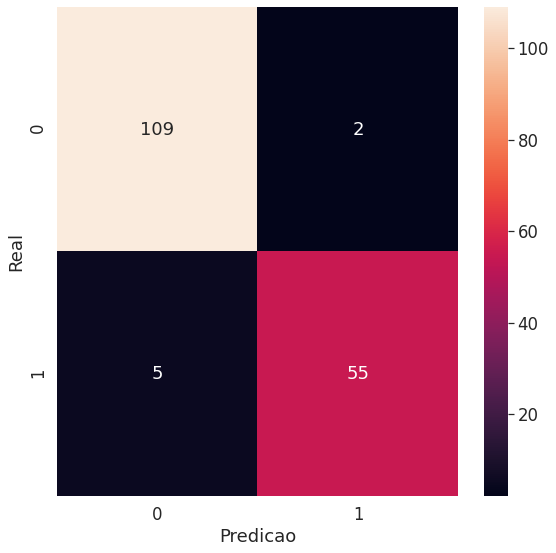

In [ ]:
plt.figure(figsize=(9,9))
sns.set(font_scale=1.5)
sns.heatmap(data=matriz_confusao, annot=True, fmt='d').set(xlabel='Predicao', ylabel='Real')
#0 é benigno
#1 é maligno

Resultado da classificação 90.06%


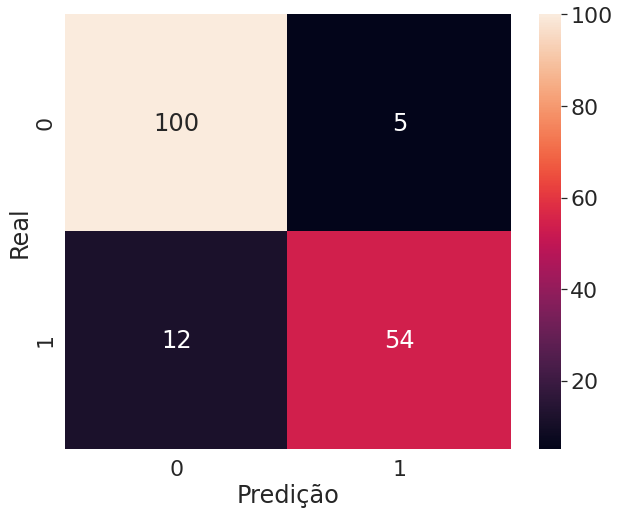

In [ ]:
from sklearn.feature_selection import RFE

SEED= 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfe,teste_y)*100))

Resultado da classificação 92.98%


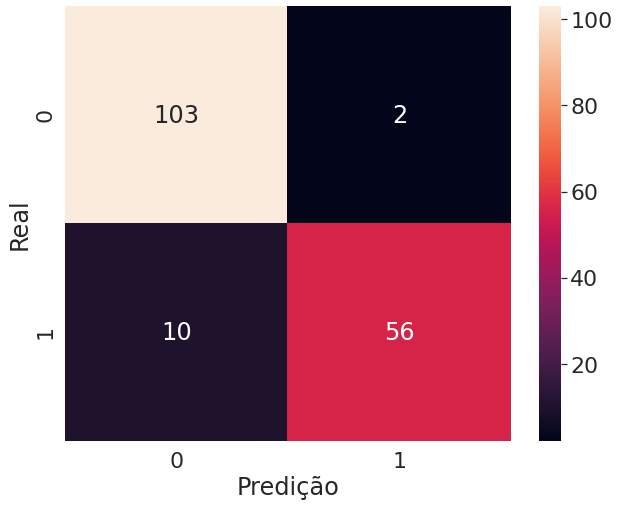

In [ ]:
from sklearn.feature_selection import RFECV

SEED= 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfecv = RFECV(estimator = classificador, cv = 5, step = 1, scoring='accuracy')
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfe = selecionador_rfecv.transform(treino_x)
teste_rfe = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfe,teste_y)*100))

In [ ]:
selecionador_rfecv.n_features_

26

In [ ]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

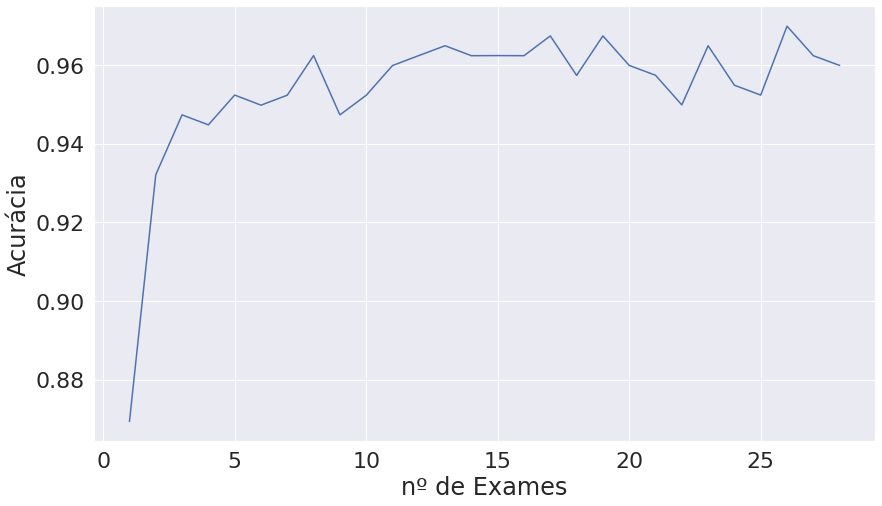

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.xlabel('nº de Exames')
plt.ylabel('Acurácia')
plt.plot(range(1, len(selecionador_rfecv.grid_scores_) + 1), selecionador_rfecv.grid_scores_)


In [ ]:
dados

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115,0.158771
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN


Resultado da classificação 87.13%


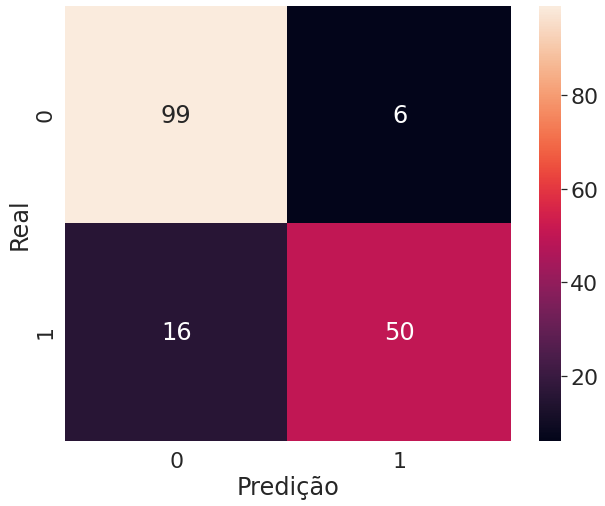

In [ ]:
from sklearn.feature_selection import RFE

SEED= 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 2, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfe,teste_y)*100))

In [ ]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)

In [ ]:
valores_exames_v7.shape

(569, 2)

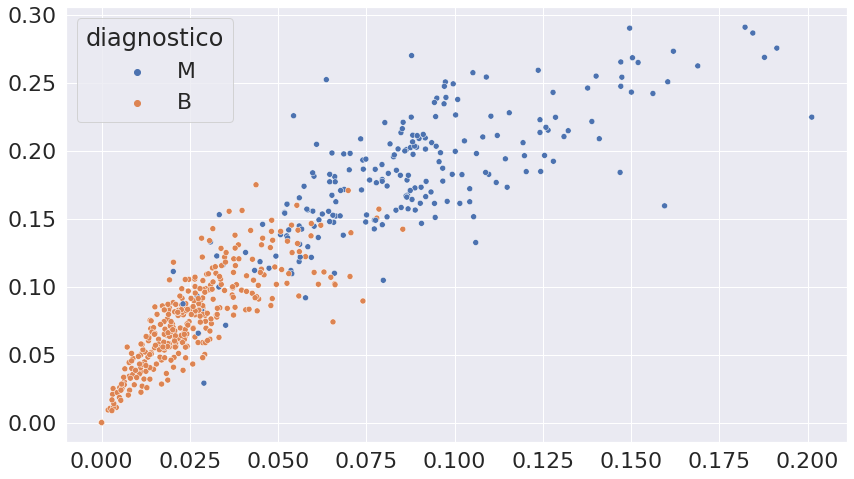

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v7[:,0], y=valores_exames_v7[:,1] ,hue=diagnostico)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)
valores_exames_v8

array([[ 8.96150504,  1.20129074],
       [ 1.44812702, -3.54148885],
       [ 5.24751143, -1.46792042],
       ...,
       [ 0.87829285, -1.93369918],
       [10.0242535 ,  0.84654838],
       [-5.04091294, -0.5352433 ]])

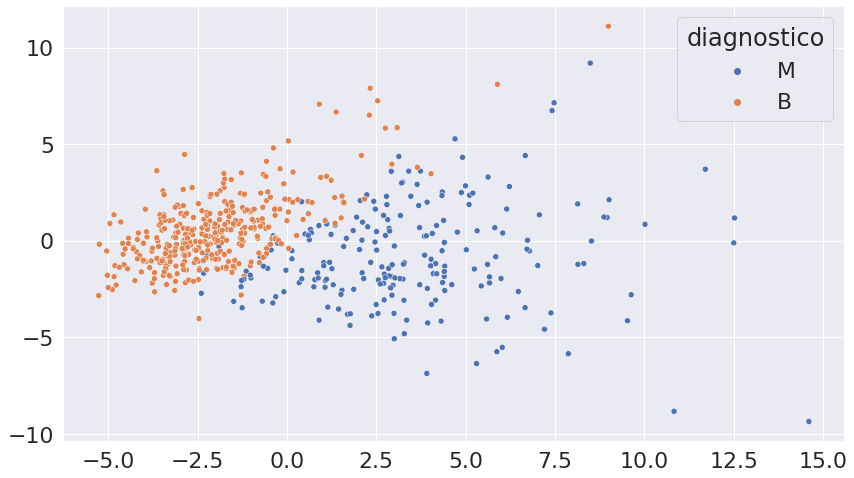

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v8[:,0], y=valores_exames_v8[:,1] ,hue=diagnostico)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)
valores_exames_v9

array([[ 16.194653  , -27.90093   ],
       [ -0.32316533, -30.006992  ],
       [ 11.3800335 , -27.562489  ],
       ...,
       [ 10.869721  ,  -0.29261386],
       [ 15.518771  , -25.177889  ],
       [  5.9475293 ,  22.599463  ]], dtype=float32)

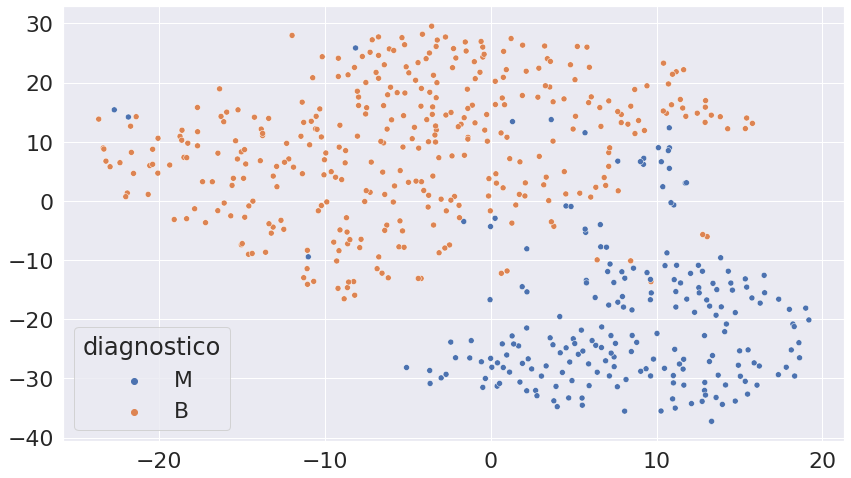

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v9[:,0], y=valores_exames_v9[:,1] ,hue=diagnostico)